In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/walking.zip'
extract_path = '/content/drive/MyDrive/Data/walking'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/running.zip'
extract_path = '/content/drive/MyDrive/Data/running'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/jogging.zip'
extract_path = '/content/drive/MyDrive/Data/jogging'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/handclapping.zip'
extract_path = '/content/drive/MyDrive/Data/handclapping'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/handwaving.zip'
extract_path = '/content/drive/MyDrive/Data/handwaving'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/fighting.zip'
extract_path = '/content/drive/MyDrive/Data/fighting'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Data/boxing.zip'
extract_path = '/content/drive/MyDrive/Data/boxing'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
!pip install pafy youtube-dl moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
seed_constant = 5
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

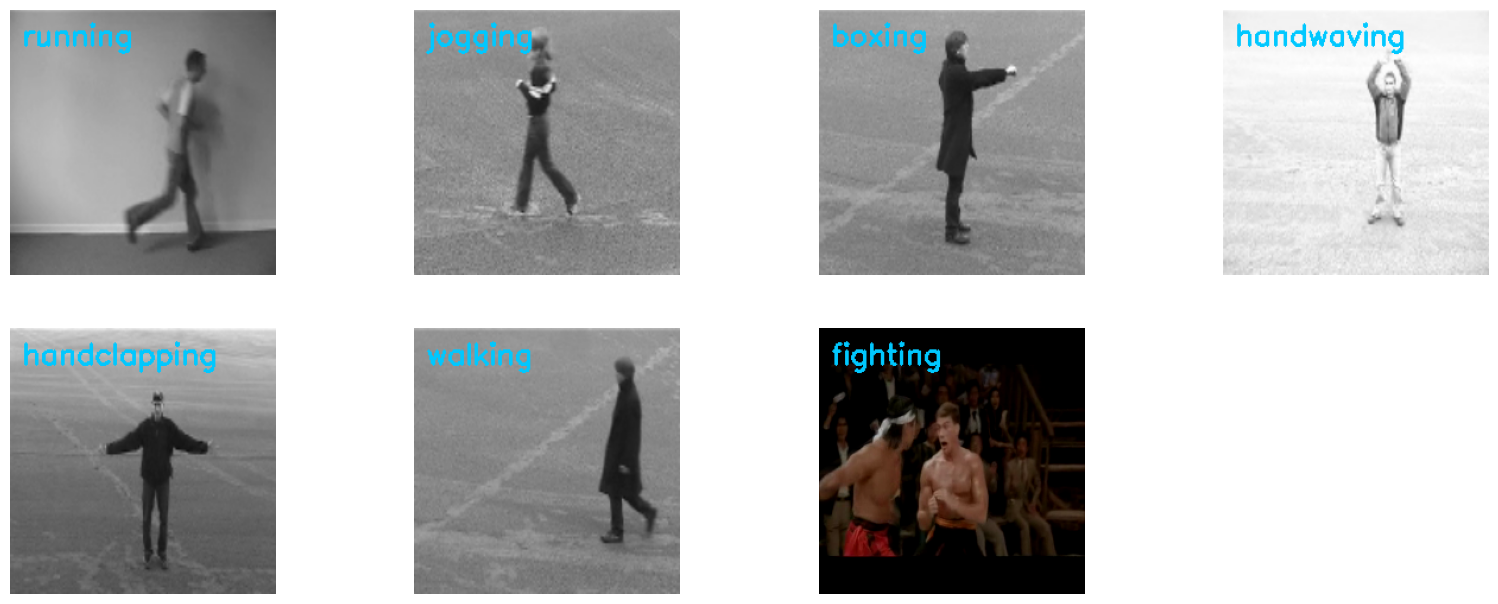

In [ ]:

plt.figure(figsize = (20, 20))

all_classes_names = os.listdir('/content/drive/MyDrive/SIH_Dataset')
for counter, random_index in enumerate(range(len(all_classes_names)), 1):
    selected_class_Name = all_classes_names[random_index]
    video_files_names_list = os.listdir(f'/content/drive/MyDrive/SIH_Dataset/{selected_class_Name}')
    selected_video_file_name = random.choice(video_files_names_list)

    
    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/SIH_Dataset/{selected_class_Name}/{selected_video_file_name}')
    video_reader.set(1, 25)
    _, bgr_frame = video_reader.read()

    bgr_frame = cv2.resize(bgr_frame ,(224,224))
    
    video_reader.release()

    
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 200, 255), 2)
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')


In [ ]:

IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 30

DATASET_DIR = "/content/drive/MyDrive/SIH_Dataset"
CLASSES_LIST = ["walking", "fighting", "running", "handclapping", "jogging", "boxing", "handwaving"]

In [ ]:
def frames_extraction(video_path):
    frames_list = []

    
    video_reader = cv2.VideoCapture(video_path)

    
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    
    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        
        normalized_frame = resized_frame / 255

       
        frames_list.append(normalized_frame)

    
    video_reader.release()
    return frames_list

In [ ]:
def create_dataset():
    
    features = []
    labels = []
    video_files_paths = []

   
    for class_index, class_name in enumerate(CLASSES_LIST):

        
        print(f'Extracting Data of Class: {class_name}')

        
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        
        for file_name in files_list:

            
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

           
            frames = frames_extraction(video_file_path)

           
            if len(frames) == SEQUENCE_LENGTH:

                
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)


    features = np.asarray(features)
    labels = np.array(labels)

    
    return features, labels, video_files_paths

In [ ]:

features, labels, video_files_paths = create_dataset()

Extracting Data of Class: walking
Extracting Data of Class: fighting
Extracting Data of Class: running
Extracting Data of Class: handclapping
Extracting Data of Class: jogging
Extracting Data of Class: boxing
Extracting Data of Class: handwaving


In [ ]:
one_hot_encoded_labels = to_categorical(labels)

In [ ]:

features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)
features = None
labels = None

In [ ]:
def create_LRCN_model():
    model = Sequential()

    

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu'), input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Conv2D(256, (2, 2), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))

    
    model.summary()

    
    return model

In [ ]:
model = create_LRCN_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 30, 64, 64, 32)    896       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 30, 16, 16, 32)    0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 30, 16, 16, 64)    18496     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 30, 4, 4, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 30, 4, 4, 128)     7

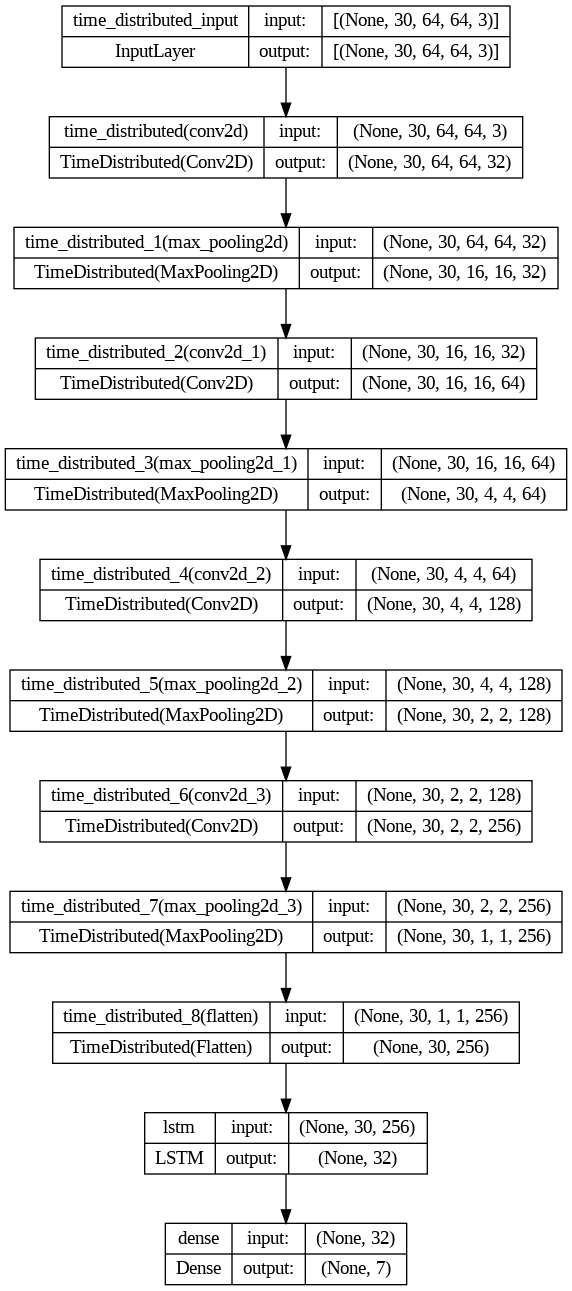

In [ ]:
plot_model(model, to_file = 'Suspicious_Human_Activity_LRCN_Model.png', show_shapes = True, show_layer_names = True)

In [ ]:

early_stopping_callback = EarlyStopping(monitor = 'accuracy', patience = 10, mode = 'max', restore_best_weights = True)

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4 , shuffle = True, validation_split = 0.25, callbacks = [early_stopping_callback])

Epoch 1/70
98/98 [==============================] - 8s 37ms/step - loss: 0.9431 - accuracy: 0.5128 - val_loss: 0.9969 - val_accuracy: 0.4427
Epoch 2/70
98/98 [==============================] - 2s 17ms/step - loss: 0.9717 - accuracy: 0.4643 - val_loss: 0.8853 - val_accuracy: 0.5191
Epoch 3/70
98/98 [==============================] - 2s 16ms/step - loss: 0.8995 - accuracy: 0.5153 - val_loss: 0.8997 - val_accuracy: 0.4733
Epoch 4/70
98/98 [==============================] - 2s 16ms/step - loss: 0.8830 - accuracy: 0.5230 - val_loss: 0.9191 - val_accuracy: 0.5115
Epoch 5/70
98/98 [==============================] - 2s 17ms/step - loss: 0.8865 - accuracy: 0.5077 - val_loss: 0.8995 - val_accuracy: 0.4733
Epoch 6/70
98/98 [==============================] - 2s 17ms/step - loss: 0.8691 - accuracy: 0.5383 - val_loss: 0.8814 - val_accuracy: 0.5344
Epoch 7/70
98/98 [==============================] - 2s 20ms/step - loss: 0.8440 - accuracy: 0.5459 - val_loss: 0.9539 - val_accuracy: 0.4885
Epoch 8/70
98

In [ ]:
# Save your Model.
model.save("Suspicious_Human_Activity_Detection_LRCN_Model.h5")

  saving_api.save_model(



In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    
    epochs = range(len(metric_value_1))

    
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))


    plt.legend()

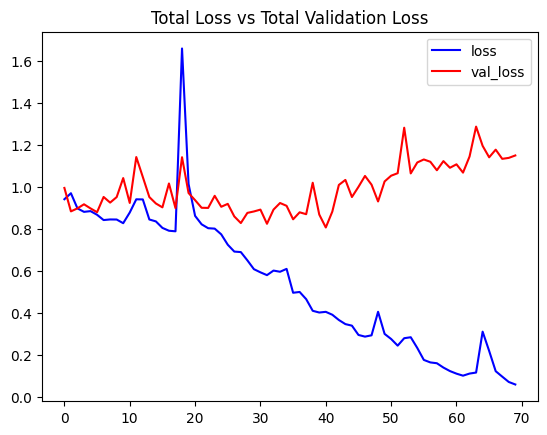

In [ ]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

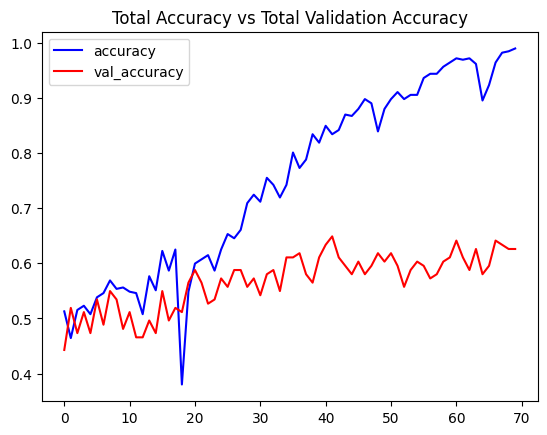

In [ ]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [ ]:

acc = 0
for i in range(len(features_test)):
  predicted_label = np.argmax(model.predict(np.expand_dims(features_test[i],axis =0))[0])
  actual_label = np.argmax(labels_test[i])
  if predicted_label == actual_label:
      acc += 1
acc = (acc * 100)/len(labels_test)
print("Accuracy =",acc)

1/1 [==============================] - 0s 21ms/step
Accuracy = 62.857142857142854
